## MOwNiT 
### Julia Smerdel, ZadanieDomowe 4

Zad 1. Implementacja własnej interpolacji wielomianowej korzystając ze wzoru Lagrange'a.

Losowanie węzłów interpolacji

In [6]:
xs = 1:1:10
knots = [rand() for x in xs]

10-element Vector{Float64}:
 0.2491288702401152
 0.761643713681769
 0.9559238077420407
 0.49317964427097916
 0.5128890984306306
 0.5823948609337833
 0.8822189200981393
 0.7711096282549647
 0.4476280249304221
 0.856475268052435

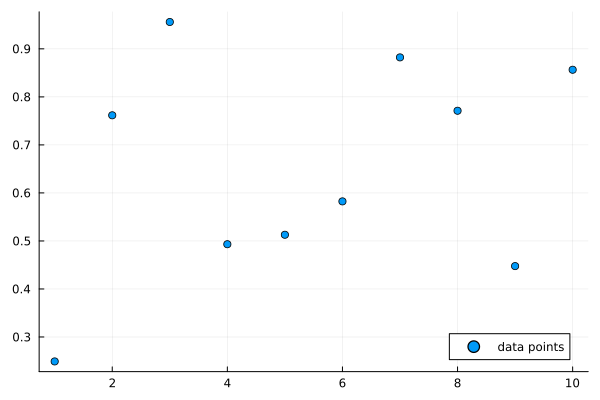

In [7]:
using Plots
scatter(xs, knots, label="data points")

Szukamy wielomianu $P_n(x)$ przechodzącego przez punkty $(x_k, y_k)$.

$L_k(x) = \frac {d}{m} = \prod_{i=0, i \neq {k}}^{n} \frac {x - x_i}{(x_k - x_i)}$

$P_n(x) = \Sigma_{k=0}^{n} f(x_k) L_k(x)$, gdzie $f(x_k)$ to współczynniki, a $L(x_k)$ to baza Lagrange'a

In [19]:
function LagrangeBase(n, k, x)
    d = 0
    m = 0
    for i = 1:n
        if (i != k)
            d = x - xs[i]
            m = xs[k] - xs[i]
        end
        
    end
    return d/m
end

LagrangeBase (generic function with 2 methods)

In [ ]:
function polynomial(n)
    
end